# Diabetes Regression Modeling Project

Welcome to the first project! In here, we will be working with the scikit-learn library to create a regression model that can predict the progression of diabetes in patients.

We'll be using the [diabetes dataset](https://scikit-learn.org/1.5/datasets/toy_dataset.html#diabetes-dataset) that comes with scikit-learn. This dataset contains ten baseline variables:

- age age in years
- sex
- bmi (body mass index)
- bp average blood pressure
- s1 tc, total serum cholesterol
- s2 ldl, low-density lipoproteins
- s3 hdl, high-density lipoproteins
- s4 tch, total cholesterol / HDL
- s5 ltg, possibly log of serum triglycerides level
- s6 glu, blood sugar level

The required libraries will be listed in the next cell for you to install if you don't have them already.

In [25]:
!pip install -q scikit-learn pandas matplotlib seaborn

In this course, we will generally be using

- `numpy` for numerical operations
- `pandas` for data manipulation
- `matplotlib` (mostly) and `seaborn` for data visualization

Scikit-learn is a library that provides simple and efficient tools for data mining and data analysis built on NumPy, SciPy, and matplotlib. It is one of the most useful libraries for machine learning in Python.

It is particularly useful for regression, classification, and clustering problems. We will be using it for this project to create a regression model.

## Instructions

In the next cell, we'll need to:
1. Import the necessary libraries
2. Load the dataset
3. Transform the dataset into a pandas DataFrame
4. Scale and standardize the dataset
5. Display the first few rows of the dataset

In [ ]:
import pandas as pd
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes = load_diabetes()

# Create a pandas dataframe
# NOTE: We could have also used the as_frame=True parameter in the load_diabetes function
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

# Mean center and scale the data if we needed to (not necessary for this dataset)

# Add the target column to the dataframe
data["target"] = diabetes.target

# View the first few rows of the data
# If using VS Code, click "open 'data' in Data Wrangler" to view the data like a spreadsheet
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## Reflection

Typically we would want to mean center and scale the data before fitting a model. This is because the variables in the dataset are in different units and have different scales, so scaling helps with the performance of many machine learning algorithms.

Fortunately, the dataset is already preprocessed and scaled. So we can skip this step.

But if the data was not already scaled, we could have:
1. **Used pandas to transform the dataset**

    ```python
    data = (data - data.mean()) / data.std()
    ```

2. **Used scikit-learn to scale the dataset**

    ```python
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    data = scaler.fit_transform(data)
    ```

    In the future, when we do use scikit-learn to scale the dataset, we will need to remember to scale the test data in the same way as the training data. This is because the model has been trained on the scaled data, so it needs to be tested on scaled data as well.

    Scikit-learn has the paradigm of a **pipeline** to handle this. Pipelines allow us to chain multiple steps together, such as scaling the data and fitting a model. **This makes it easier to ensure that the same steps are applied to the training and test data.**

    We will learn more about pipelines in the future.

## Understanding the Data

Understanding the data is an important step in the machine learning process. It helps us to understand the relationships between the features and the target variable.

Training machine learning models are most definitely human-in-the-loop processes. We need to understand the data to make informed decisions about which model to use, how to preprocess the data, and how to evaluate the model.

### Data Visualization

Let's now visualize the features of the dataset using a pairplot.

The pairplot is a great way to visualize the relationships between all the features in the dataset. It will help us understand the relationships between the features and the target variable.

Tip: this is a lot of data! Use the `expand image` button to view the pairplot in full screen.

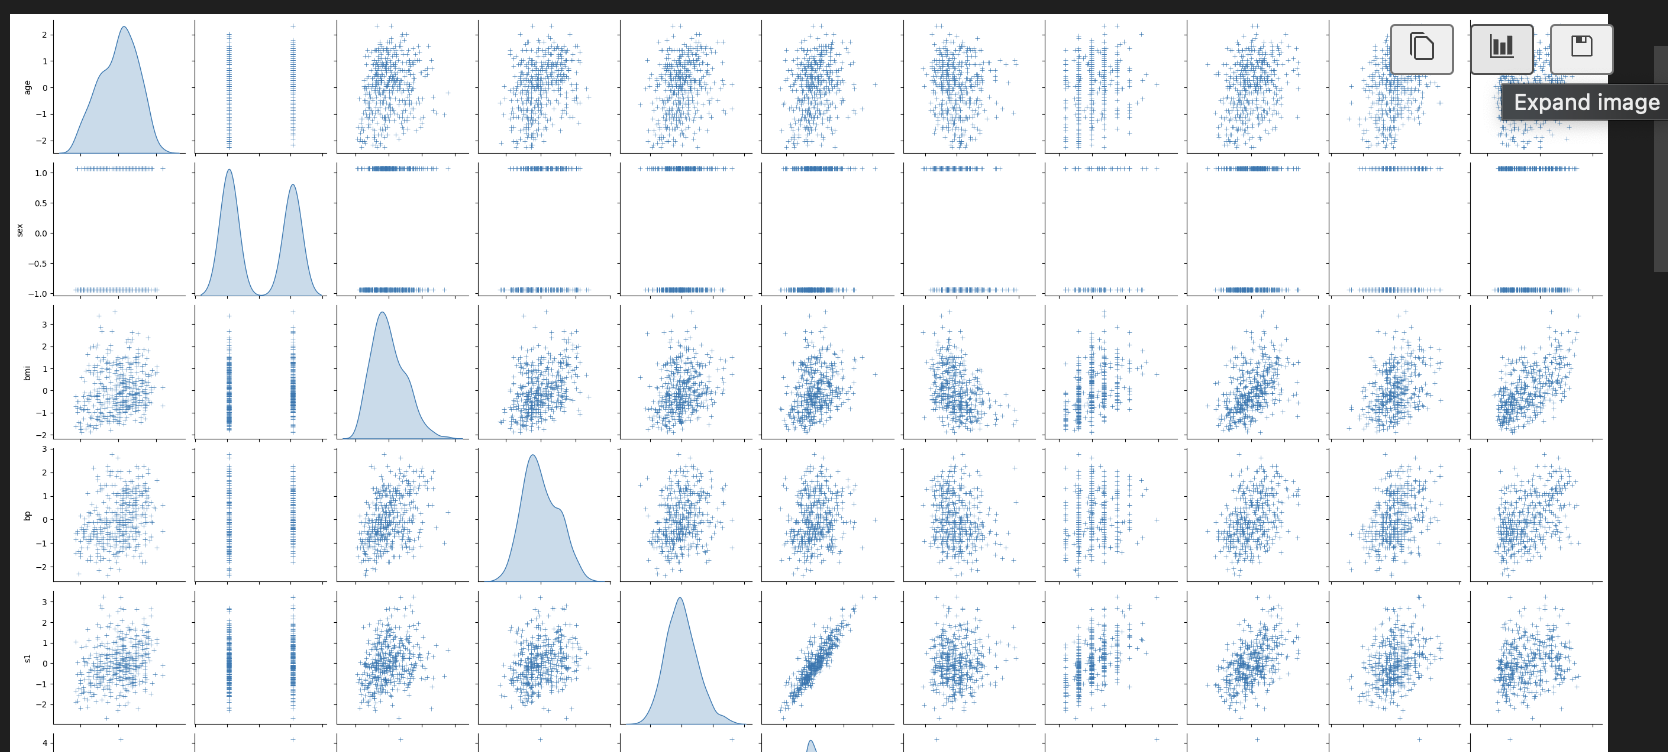

## Instructions

In the next cell, we'll need to:
1. Visualize the features of the dataset using a pairplot
2. Display the pairplot

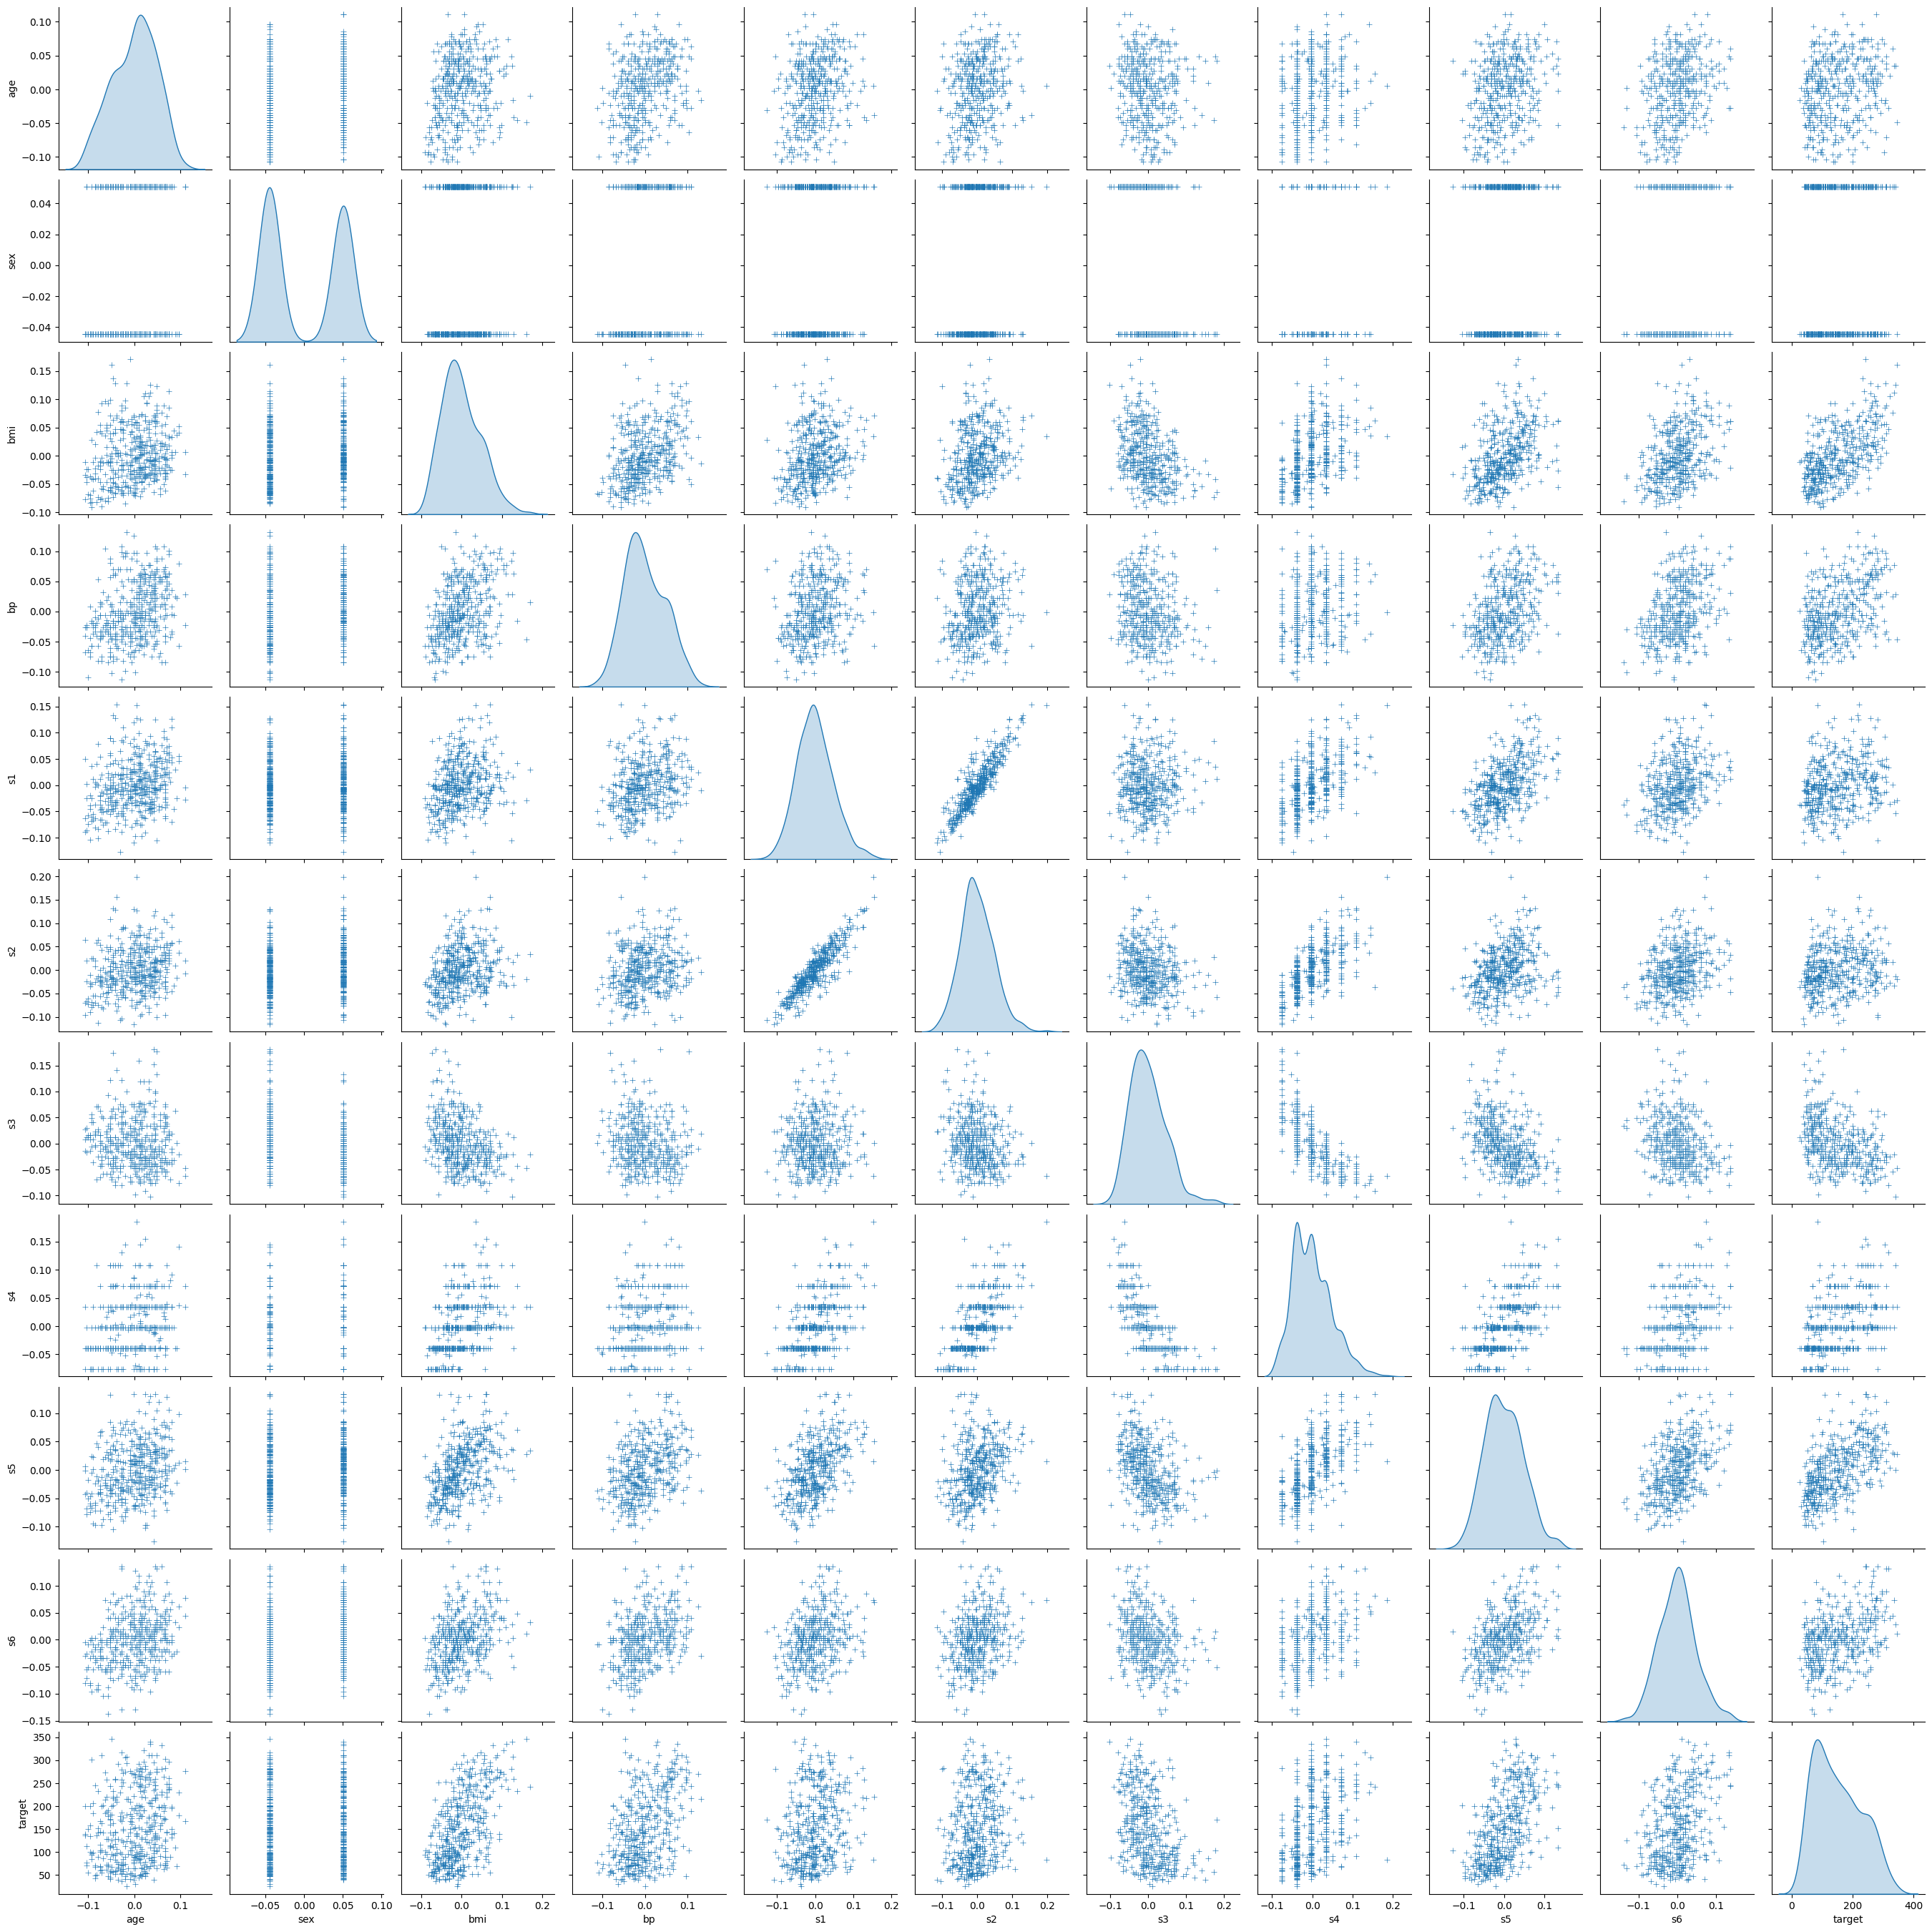

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot both feature and target columns in a pairplot
sns.pairplot(data, diag_kind="kde", markers="+")
plt.show()

## Training The Model

Now that we have the dataset loaded and transformed into a pandas DataFrame, we can start training the model.

We will be using the `LinearRegression` class from scikit-learn to create a linear regression model. This class uses the ordinary least squares method to fit the model to the data.

Training machine learning models revolves around the following steps:

1. **Splitting the data into training and test sets**
    
    We need to split the data into two sets: one for training the model and one for testing the model. This is because we need to evaluate the model on data that it has not seen before.

    We will use the `train_test_split` function from scikit-learn to split the data. This function shuffles the data and splits it into training and test sets.

2. **Fitting the model to the training data**

    We will use the `fit` method of the `LinearRegression` class to fit the model to the training data. This method takes the input features and target values as arguments.

3. **Evaluating the model**

    We will be using the mean squared error (MSE) to evaluate the model. The MSE is a measure of how well the model predicts the target values. It is calculated as the average of the squared differences between the predicted and actual target values.

    This is a commonly used loss function for regression problems. The lower the MSE, the better the model.

    Loss functions are a machine learning concept that measures how well the model is performing. The goal of training a machine learning model is to **minimize the loss function**.

    We could use the `score` method of the `LinearRegression` class to evaluate the model on the test data (R^2 if you're familiar with this term). This method calculates the coefficient of determination, which is a measure of how well the model fits the data. The coefficient of determination ranges from 0 to 1, with 1 indicating a perfect fit.

    In general, we should be wary of overfitting the model to the training data. Overfitting occurs when the model learns the noise in the training data rather than the underlying pattern. This can lead to poor performance on new data.

    [_The Little Book of Deep Learning_](https://fleuret.org/francois/lbdl.html) has a great image explaining overfitting (figure 1.2):

    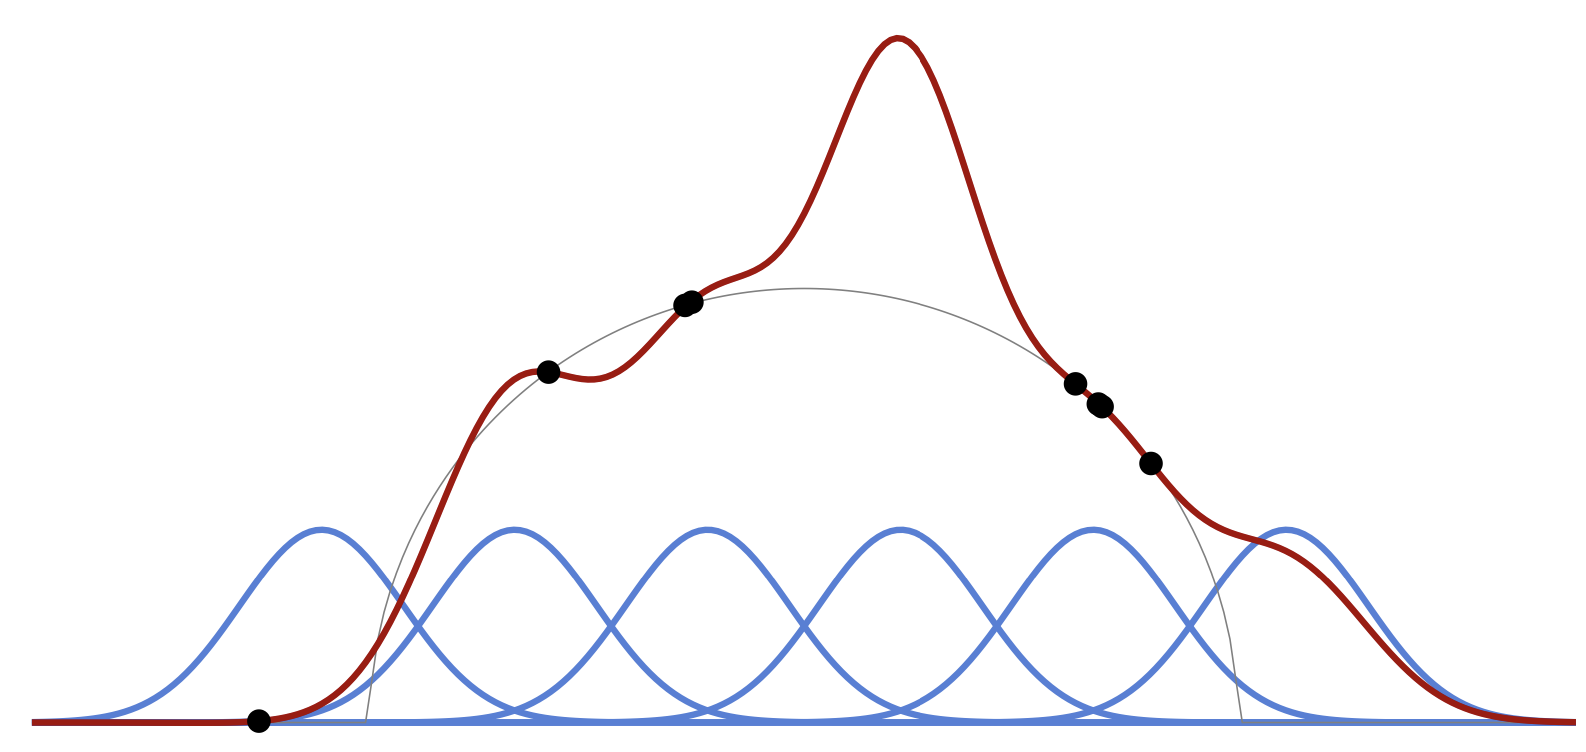

## Instructions

In the next cell, we'll need to:
1. Split the data into training and test sets
2. Create a linear regression model
3. Fit the model to the training data
4. Evaluate the model on the test data using the mean squared error

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data[diabetes.feature_names], data["target"]
)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Print the mean squared error and the R^2 score
print(
    f"Training Minimized Mean Squared Error: {mean_squared_error(y_train, model.predict(X_train))}"
)
print(f"Training R^2 Score: {model.score(X_train, y_train)}")

Training Minimized Mean Squared Error: 2825.6473100708786
Training R^2 Score: 0.5148380665087623


## Reflection

We've now successfully trained a linear regression model to predict the progression of diabetes in patients. The model has been evaluated on the test data using the mean squared error.

The next step is to use the model to make predictions and evaluate the performance on the **unseen** data again using the mean squared error.

## Instructions

In the next cell, we'll need to:
1. Make predictions using the model and the **test data**
2. Evaluate the model on the test data using the mean squared error

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the mean squared error and the R^2 score
print(f"Testing Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Testing R^2 Score: {model.score(X_test, y_test)}")

Testing Mean Squared Error: 3092.677568453795
Testing R^2 Score: 0.4879654873152883


## Reflection

In my case, I actually saw a decrease in the mean squared error when evaluating the model on the test data. This is a good sign that the model is generalizing well to new data!

There are still a few things we could do to improve the model:

1. **Feature Engineering**

    We could try adding new features to the dataset that might help the model make better predictions. For example, we could try adding interaction terms between the features.

2. **Hyperparameter Tuning**

    This is more relevant for other models with more hyperparameters neural networks, but worth mentioning as a common practice to improve model performance in machine learning.

    The hyperparameters of a model are the settings that control how the model learns from the data. For example, the learning rate of a neural network is a hyperparameter. For a random forest, the number of trees and the maximum depth of the trees are hyperparameters.

3. **Cross-Validation**

    Cross-validation is a technique used to evaluate the performance of a model on different subsets of the data. Using cross-validation can help us get a better estimate of the model's performance for unseen data.

    Grid search or random search use cross-validation to find the best hyperparameters for the model.
    
4. **Model Selection**
    
    We could try using different models to see if they perform better than the linear regression model. For example, we could try using a ridge regression model or a support vector regression model.

But for this project, we will stop here. We have successfully trained a linear regression model to predict the progression of diabetes in patients and evaluated its performance on the test data.

The last step is to visualize the predictions made by the model and further understand the relationships between the features and the target variable.

## Instructions

In the next cell, we'll need to:
1. Visualize the predictions made by the model using a scatter plot
2. Visualize the relationship between the features and the target variable using a scatter plot
3. Display the scatter plots

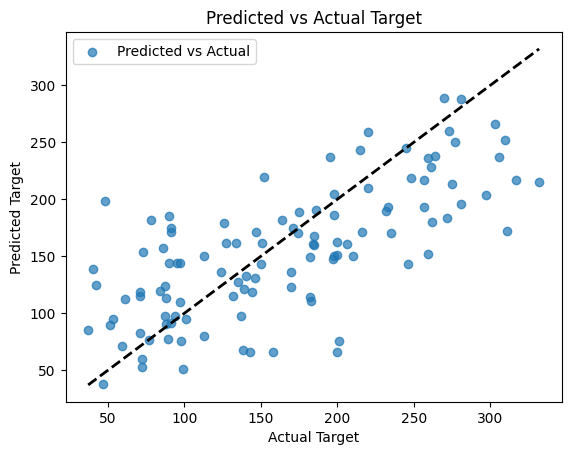

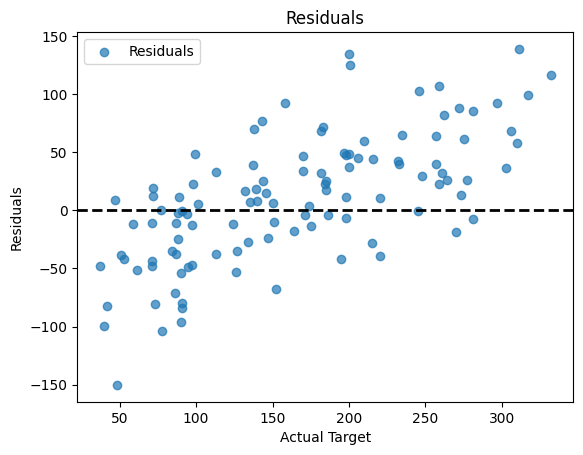

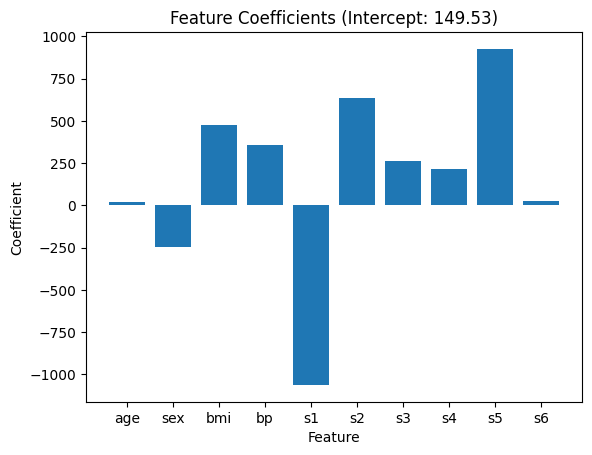

In [ ]:
# Plot the predicted vs actual values
plt.scatter(y_test, y_pred, label="Predicted vs Actual", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.title("Predicted vs Actual Target")
plt.legend()
plt.show()

# Plot the residuals
plt.scatter(y_test, y_test - y_pred, label="Residuals", alpha=0.7)
plt.axhline(y=0, color="k", linestyle="--", lw=2)
plt.xlabel("Actual Target")
plt.ylabel("Residuals")
plt.title("Residuals")
plt.legend()
plt.show()

# Plot the coefficients
plt.bar(diabetes.feature_names, model.coef_)
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.title(f"Feature Coefficients (Intercept: {model.intercept_:.2f})")
plt.show()

## Final Thoughts

Congratulations on completing the first project! You've successfully trained a linear regression model to predict the progression of diabetes in patients.

Maybe a linear regression model is not the best model for this dataset--we can see that the relationship between the features and the target variable is not strictly linear. But it's a good starting point for understanding the data and building a simple model.

### Recap

In this project, we've learned how to:

- Load a dataset using scikit-learn
- Transform the dataset into a pandas DataFrame
- Split the data into training and test sets
- Train a linear regression model
- Evaluate the model using the mean squared error
- Make predictions using the model
- Evaluate the model on the test data
- Visualize the predictions made by the model
- Visualize the relationship between the features and the target variable

### Next Steps

If you are interested in regression models, feel free to take a deep dive. When you're done, continue on to the next project!